Tensorflow and keras

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8898
Epoch 2/100
235/235 [========================

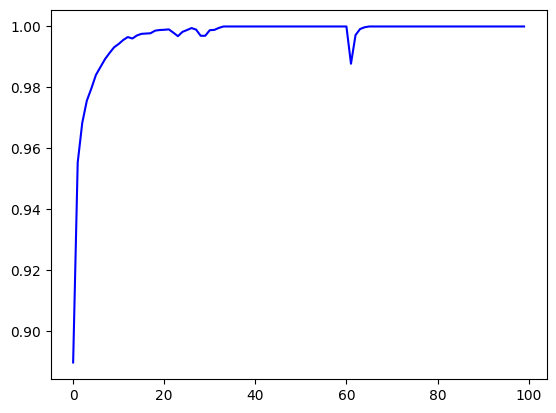

In [4]:
#تمرین 4 بوت کمپ که بر روی داده mnist

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))

#model.compile(optimizer='adam',loss=['sparse_categorical_crossentropy'],metrics=['accuracy'])
model.compile(optimizer=tf.optimizers.Adam() , loss=tf.losses.sparse_categorical_crossentropy , metrics=['accuracy'])

model.build(input_shape=(None,28,28,1))
model.summary()

hist=model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=100,batch_size=256)

acc=hist.history['accuracy']
plt.plot(acc,color='blue') 

test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print('Test accuracy:', test_acc)

Pytorch

In [5]:
#تمرین 4 بوت کمپ که بر روی داده mnist
import torch
from torchvision import datasets, transforms

# تعریف تبدیلات
transform = transforms.Compose([transforms.ToTensor()])

# دانلود و آماده سازی داده ها
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# ایجاد دیتالودرها
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import pandas as pd


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

results = []
for epoch in range(5):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    results.append({'Epoch': epoch+1, 'Accuracy': accuracy})
    print('Accuracy of the network on the test images: %d %%' % accuracy)


df = pd.DataFrame(results)
print(df)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:08<00:00, 1102828.85it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 146523.53it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1483647.00it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2263339.52it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

[1,   100] loss: 1.396
[1,   200] loss: 0.470
[1,   300] loss: 0.383
[1,   400] loss: 0.349
[1,   500] loss: 0.303
[1,   600] loss: 0.285
[1,   700] loss: 0.270
[1,   800] loss: 0.251
[1,   900] loss: 0.227
Accuracy of the network on the test images: 94 %
[2,   100] loss: 0.189
[2,   200] loss: 0.191
[2,   300] loss: 0.186
[2,   400] loss: 0.177
[2,   500] loss: 0.173
[2,   600] loss: 0.197
[2,   700] loss: 0.166
[2,   800] loss: 0.159
[2,   900] loss: 0.144
Accuracy of the network on the test images: 95 %
[3,   100] loss: 0.136
[3,   200] loss: 0.133
[3,   300] loss: 0.131
[3,   400] loss: 0.123
[3,   500] loss: 0.132
[3,   600] loss: 0.116
[3,   700] loss: 0.116
[3,   800] loss: 0.131
[3,   900] loss: 0.115
Accuracy of the network on the test images: 96 %
[4,   100] loss: 0.102
[4,   200] loss: 0.111
[4,   300] loss: 0.104
[4,   400] loss: 0.104
[4,   500] loss: 0.108
[4,   600] loss: 0.106
[4,   700] loss: 0.